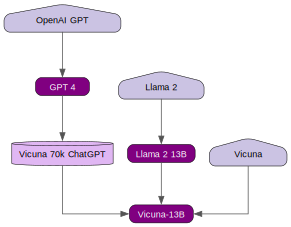

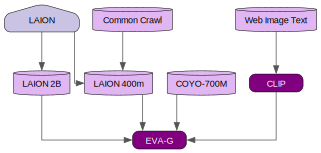

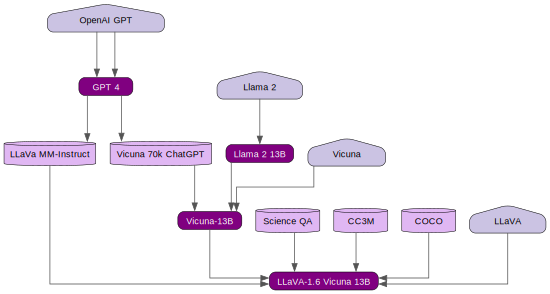

In [2]:
from modelrecords.repository import Repository
import pygraphviz as pgv
def render_modelgraph(nodes, edges, records):
    styles = {
        'family': dict(shape="house", style="rounded, filled",penwidth=0.5, height=0.25, fillcolor="#CBC3E3", fontname="Helvetica"),
        'dataset': dict(shape="cylinder", style="rounded, filled",penwidth=0.5, width=0.75, height=0.25, fillcolor="#E0B7F3", fontname="Helvetica"),
        'model': dict(shape="box", style="rounded, filled", penwidth=0.5, height=0.25, fontcolor="#FFF", fillcolor="#800080", fontname="Helvetica"),
    }

    G = pgv.AGraph(directed=True, rankdir="L", strict=False, nodesep=0.2, style='rounded', overlap=True, splines='ortho')
    for node in nodes:
        G.add_node(node, **styles[records[node].type], label=records[node].model_name)
    for A, B in edges:
        G.add_edge(B, A, color="#545454", penwidth=0.75, shape='rect', arrowsize=0.75)

    #G.graph_attr.update(dpi="90")#, size="10,10", ranksep="0.25", nodesep="0.15", margin="1")
    G.node_attr.update(fontsize="9", fontcolor="black", color="black")
    #G.edge_attr.update(fontsize="8", fontcolor="black", color="black")
    G.layout(prog="dot") 
    return G

repo = Repository()
mr = repo.find('vicuna-13b')
display(render_modelgraph(*repo.find_parent_packages(mr)))

mr = repo.find('eva-g')
display(render_modelgraph(*repo.find_parent_packages(mr)))

mr = repo.find('LLaVA-1.6-Vicuna-13B')
display(render_modelgraph(*repo.find_parent_packages(mr)))